空氣品質指標AQI的定義
空氣品質指標為依據監測資料將當日空氣中臭氧 (O3)、細懸浮微粒 (PM2.5)、懸浮微粒 (PM10)、一氧化碳 (CO)、二氧化硫 (SO2) 及二氧化氮 (NO2) 濃度等數值，以其對人體健康的影響程度，分別換算出不同污染物之副指標值，再以當日各副指標之最大值為該測站當日之空氣品質指標值 (AQI)。

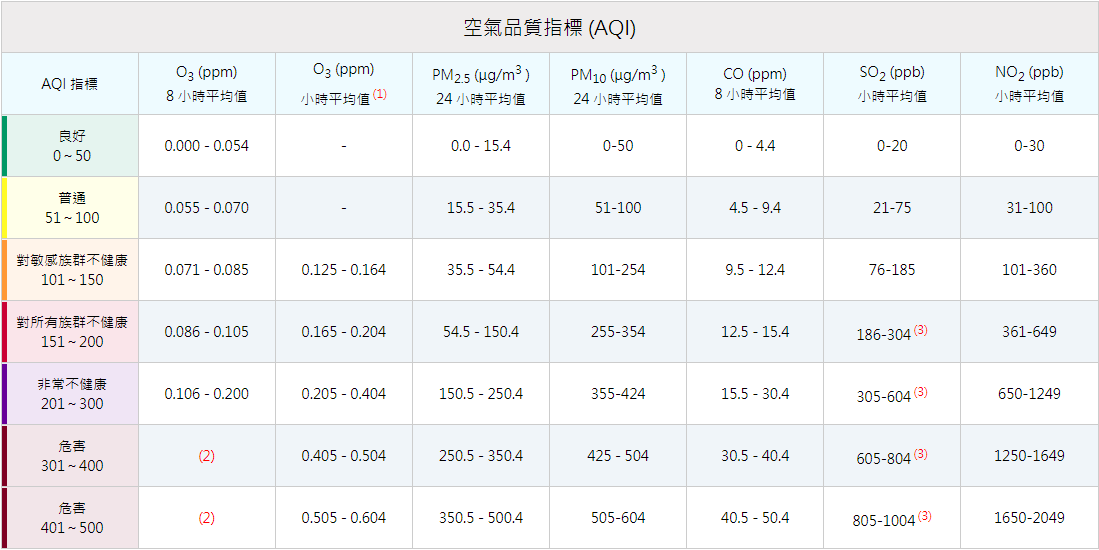

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('aqx_p.csv')

In [4]:
df.head(10)

,SiteId,SiteName,MonitorDate,AQI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex,O38SubIndex,PM25SubIndex
0,43,新營,2022-03-17,89,5,3,NaN,44.0,28,64.0,89.0
1,67,三重,2022-03-17,101,12,16,NaN,47.0,64,NaN,101.0
2,17,桃園,2022-03-17,97,22,6,NaN,50.0,47,35.0,97.0
3,57,前鎮,2022-03-17,96,12,7,NaN,57.0,51,NaN,96.0
4,9,林口,2022-03-17,83,8,5,NaN,41.0,50,44.0,83.0
5,54,左營,2022-03-17,97,15,6,NaN,51.0,42,93.0,97.0
6,33,彰化,2022-03-17,107,10,5,NaN,60.0,48,39.0,107.0
7,32,西屯,2022-03-17,102,20,5,NaN,54.0,57,43.0,102.0
8,42,嘉義,2022-03-17,86,8,3,NaN,44.0,30,58.0,86.0
9,58,小港,2022-03-17,99,18,6,NaN,53.0,64,42.0,99.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SiteId        1000 non-null   int64  
 1   SiteName      1000 non-null   object 
 2   MonitorDate   1000 non-null   object 
 3   AQI           1000 non-null   int64  
 4   SO2SubIndex   1000 non-null   int64  
 5   COSubIndex    1000 non-null   int64  
 6   O3SubIndex    1 non-null      float64
 7   PM10SubIndex  996 non-null    float64
 8   NO2SubIndex   1000 non-null   int64  
 9   O38SubIndex   858 non-null    float64
 10  PM25SubIndex  982 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 86.1+ KB


In [6]:
df.describe()

,SiteId,AQI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex,O38SubIndex,PM25SubIndex
count,1000.000000,1000.00000,1000.00000,1000.000000,1.0,996.000000,1000.000000,858.000000,982.000000
mean,39.856000,72.55000,8.00700,4.448000,104.0,38.323293,37.125000,60.484848,63.269857
std,23.429772,25.47203,7.53005,2.588048,NaN,15.677077,16.605093,24.122700,26.939913
min,1.000000,22.00000,0.00000,1.000000,104.0,1.000000,0.000000,17.000000,9.000000
25%,20.000000,53.75000,5.00000,3.000000,104.0,27.000000,23.000000,43.000000,44.000000
50%,39.000000,71.00000,8.00000,5.000000,104.0,38.000000,37.000000,51.000000,61.500000
75%,60.000000,90.00000,10.00000,6.000000,104.0,48.000000,52.000000,74.000000,81.000000
max,85.000000,169.00000,75.00000,20.000000,104.0,97.000000,80.000000,169.000000,155.000000


In [7]:
#檢查是否有空值
df.isna().sum()

SiteId            0
SiteName          0
MonitorDate       0
AQI               0
SO2SubIndex       0
COSubIndex        0
O3SubIndex      999
PM10SubIndex      4
NO2SubIndex       0
O38SubIndex     142
PM25SubIndex     18
dtype: int64

In [8]:
df = df.fillna(0) #NaN取代為0

In [9]:
df.groupby('AQI').mean()

,SiteId,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex,O38SubIndex,PM25SubIndex
AQI,,,,,,,,
22,80.00,5.00,1.000000,0.0,12.0,8.000000,21.000000,22.0
25,80.00,2.00,1.000000,0.0,9.0,8.000000,25.000000,20.0
26,41.00,8.00,3.000000,0.0,26.0,17.000000,0.000000,23.0
27,50.00,5.00,1.666667,0.0,14.0,15.666667,17.666667,25.0
28,72.50,5.00,3.500000,0.0,21.0,17.000000,14.000000,21.0
...,...,...,...,...,...,...,...,...
152,40.00,5.00,5.000000,0.0,78.0,17.000000,87.000000,152.0
153,42.00,12.00,5.000000,0.0,83.0,23.000000,87.000000,153.0
154,49.25,6.75,4.250000,0.0,66.5,27.000000,106.500000,110.0


In [10]:
aqi_target = df['AQI']

In [11]:
aqi_data = df.drop(columns = ['SiteId','SiteName','MonitorDate','AQI'])

In [12]:
feature_names = aqi_data.columns
feature_names

Index(['SO2SubIndex', 'COSubIndex', 'O3SubIndex', 'PM10SubIndex',
       'NO2SubIndex', 'O38SubIndex', 'PM25SubIndex'],
      dtype='object')

In [13]:
x_train, x_test, y_train, y_test = train_test_split(aqi_data, aqi_target, test_size=0.4, random_state=87)

In [14]:
regr = LinearRegression()

In [15]:
regr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_predict = regr.predict(x_test)

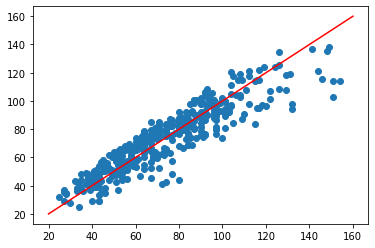

In [17]:
plt.scatter(y_test, y_predict)
plt.plot([20,160],[20,160],'r')

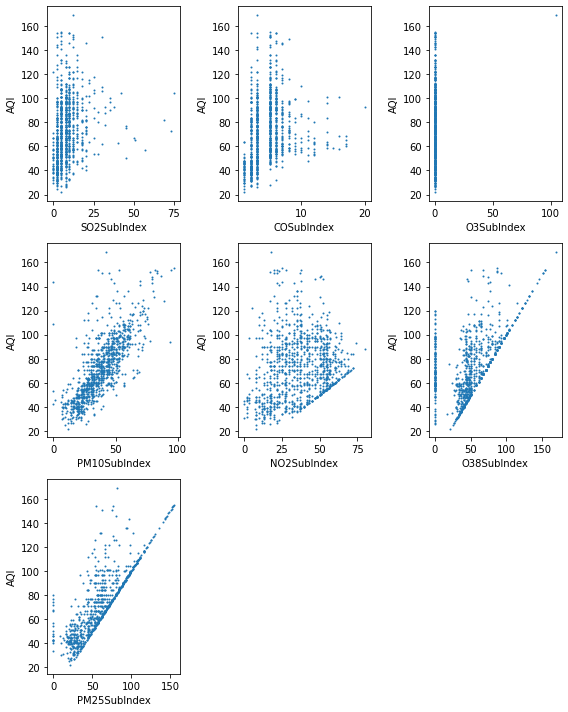

In [18]:
plt.figure(figsize=(8,10))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.scatter(aqi_data.values[:,i], aqi_target.values, s=1) #將使用DataFrame.values屬性以返回給定DataFrame的numpy表示形式
    plt.ylabel("AQI")
    plt.xlabel(feature)
    plt.tight_layout()

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df1 = df.head(20)

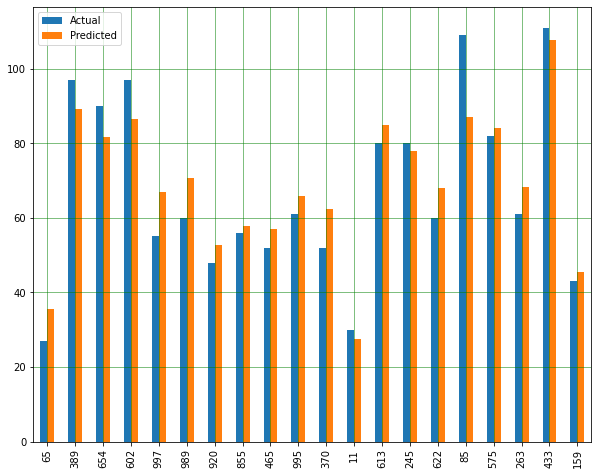

In [20]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<AxesSubplot:xlabel='AQI', ylabel='Count'>

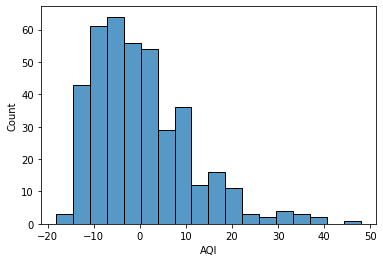

In [21]:
sns.histplot((y_test-y_predict))